In [2]:
# !git clone 'https://github.com/Lorenz92/SKADC1.git'
# % cd SKADC1
# !echo $PWD

In [1]:
import pandas as pd
import numpy as np

import src.dataset as dataset
import src.config as config 
from src.utils import *
import src.models as models
import src.losses as loss

path = config.TRAIN_PATCHES_FOLDER
%load_ext autoreload
%autoreload 2

np.random.seed(config.RANDOM_SEED)

In [4]:
if 'google.colab' in str(get_ipython()):
  use_colab = True
  print('Running on CoLab')
else:
  use_colab = False
  print('Not running on CoLab')

Not running on CoLab


In [5]:
if use_colab:
    # Read file from Colab Notebook
    from google.colab import drive
    drive.mount('/content/drive')
    config.MODEL_WEIGHTS = "/content/drive/My Drive/Colab Notebooks/SKADC1"
    config.IMAGE_PATH = "/content/drive/My Drive/Colab Notebooks/SKADC1/asset/560Mhz_1000h.fits"

Dataset shape: (19222, 15)


,ID,RA (core),DEC (core),RA (centroid),DEC (centroid),FLUX,Core frac,BMAJ,BMIN,PA,SIZE,CLASS,SELECTION,x,y
0,24121695,-0.642227,-29.775242,-0.642316,-29.775211,0.000035,0.000000,5.600,5.551,328.554,1,1,1,19704.519,17712.942
1,20167150,-0.390473,-29.867493,-0.390667,-29.868851,0.029555,0.016924,107.110,43.263,191.258,1,1,1,18401.338,17160.919
2,20045120,-0.021411,-29.643486,-0.021359,-29.643561,0.000653,0.012185,5.037,3.525,276.587,1,1,1,16493.600,18506.577
3,33938384,-0.316375,-29.697647,-0.316375,-29.697647,0.000017,0.000000,0.847,0.266,346.641,2,1,1,18020.319,18182.095
4,7527248,-0.336528,-29.627335,-0.336527,-29.627338,0.000054,0.044763,3.343,1.515,279.006,1,1,1,18125.824,18600.680


  3%|▎         | 502/19222 [00:00<00:03, 5013.78it/s]

Loading FITS file /Users/lorenzocellini/AI - Universit…/Deep Learning - Andre Asperti/SKA_project/SKADC1/data/training/560Mhz_1000h.fits


100%|██████████| 19222/19222 [00:03<00:00, 6346.82it/s]


Initial dataset shape: (19222, 15)
Found 0 boxes with zero area
Rows to be deleted: 0
New dataset shape: (19222, 15)
Extending dataset with new computed columns...
Final cleaned dataset shape: (19222, 26)

Enlarging bboxes...
DONE - Enlarging bboxes...


,ID,RA (core),DEC (core),RA (centroid),DEC (centroid),FLUX,Core frac,BMAJ,BMIN,PA,...,y1,x2,y2,major_semia_px,minor_semia_px,pa_in_rad,width,height,area_orig,area_cropped
0,24121695.0,-0.642227,-29.775242,-0.642316,-29.775211,0.000035,0.000000,5.600,5.551,328.554,...,17706.708393,19710.764566,17719.170105,6.264429,6.218255,5.734349,12.503792,12.461712,155.818657,155.818657
1,20167150.0,-0.390473,-29.867493,-0.390667,-29.868851,0.029555,0.016924,107.110,43.263,191.258,...,17112.270219,18509.603417,17209.564571,110.037236,44.503323,3.338082,216.538139,97.294352,21067.937901,21067.937901
2,20045120.0,-0.021411,-29.643486,-0.021359,-29.643561,0.000653,0.012185,5.037,3.525,276.587,...,18500.850356,16498.009965,18512.295208,5.738106,4.389739,4.827354,8.820318,11.444852,100.947234,100.947234
3,33938384.0,-0.316375,-29.697647,-0.316375,-29.697647,0.000017,0.000000,0.847,0.266,346.641,...,18179.521298,18023.322729,18184.661968,3.031418,2.541842,6.050027,6.014593,5.140670,30.919039,30.919039
4,7527248.0,-0.336528,-29.627335,-0.336527,-29.627338,0.000054,0.044763,3.343,1.515,279.006,...,18596.465498,18128.789688,18604.884928,4.236891,2.929772,4.869573,5.937378,8.419429,49.989332,49.989332



----------
Starting training image preprocessing...

Computing max and min pixel value in order to scale image to RGB range
Max pixel value = 0.0065856808796525
Removing negative noise...
Converting to RGB...
Removing positive noise and rescaling to 0-255 interval...

Mean and stdev of the half-gaussian that best fits with noise distribution:
mu=4.561610766868865e-14, stdev=4.5037468510513567e-07
End of training image preprocessing.


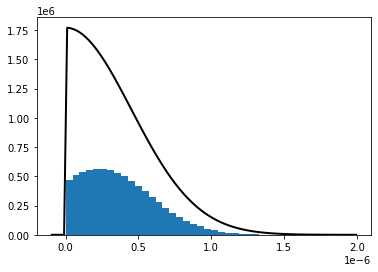

In [2]:
# Dataset parsing and loading
# use "subset" in config file to load a small portion of data for development/debugging purposes
ska_dataset = dataset.SKADataset(k=3, print_info=False, use_pb=False)

In [5]:
ska_dataset.cleaned_train_df[['width', 'height', 'area_orig', 'area_cropped']].describe()

,width,height,area_orig,area_cropped
count,1162.000000,1162.000000,1162.000000,1162.000000
mean,5.234792,5.155283,44.740291,44.740291
std,6.263878,3.030626,618.042759,618.042759
min,4.964840,4.964840,24.649632,24.649632
25%,4.974767,4.974501,24.761937,24.761937
50%,4.987100,4.986699,24.884089,24.884089
75%,5.016140,5.014193,25.159941,25.159941
max,216.538139,97.294352,21067.937901,21067.937901


In [9]:
ska_dataset.cleaned_train_df[['width', 'height', 'area_orig']].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,.99,1.])

,width,height,area_orig
0.10,5.021579,5.022318,25.628098
0.20,5.079478,5.083666,26.354817
0.30,5.153434,5.154979,27.221580
0.40,5.250224,5.256348,28.358833
0.50,5.388071,5.394034,29.928541
0.60,5.596149,5.603978,32.164977
0.70,5.931373,5.932616,36.070023
0.80,6.568193,6.603042,43.494231
0.90,8.241342,8.188366,63.754795
0.95,10.577456,10.646052,100.988437


  0%|          | 0/64 [00:00<?, ?it/s]

Patch 0_16376_16729_100 saved.
Max gray level value =  176.0


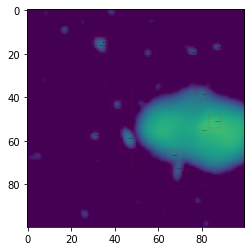

Patch 50_16426_16729_100 saved.
Max gray level value =  176.0


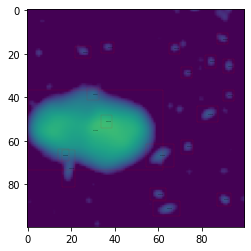

Patch 100_16476_16729_100 saved.
Max gray level value =  154.0


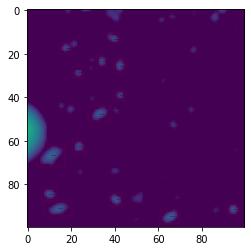

  2%|▏         | 1/64 [00:02<02:20,  2.23s/it]

Patch 1550_16376_16779_100 saved.
Max gray level value =  176.0


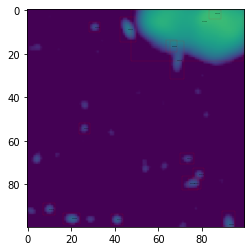

Patch 1600_16426_16779_100 saved.
Max gray level value =  176.0


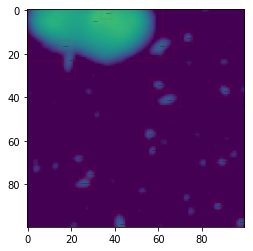

Patch 1650_16476_16779_100 saved.
Max gray level value =  154.0


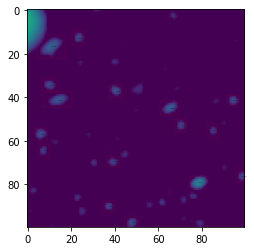

  3%|▎         | 2/64 [00:04<02:11,  2.12s/it]

Patch 3100_16376_16829_100 saved.
Max gray level value =  85.0


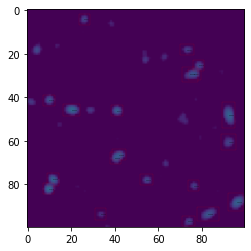

Patch 3150_16426_16829_100 saved.
Max gray level value =  95.0


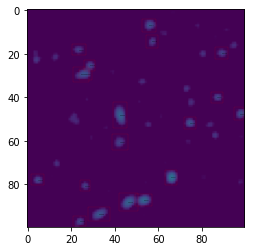

Patch 3200_16476_16829_100 saved.
Max gray level value =  114.0


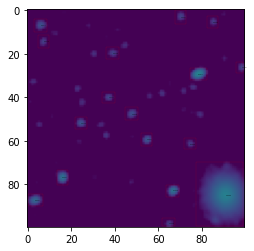

100%|██████████| 64/64 [00:06<00:00,  9.74it/s]


Class list: ['1_1' '2_1' '3_1']
Number of distinct class labels: 3


In [3]:
show_plot = True
ska_dataset.generate_patches(limit=1, plot_patches=show_plot) # Remember to remove internal return

Number of possible class combinations: 7


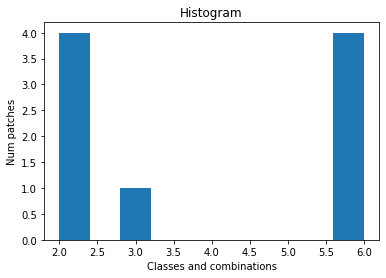

In [4]:
ska_dataset.analyze_class_distribution()

In [5]:
ska_dataset.split_train_val_stratified(random_state=42, val_portion=0.2)

print(len(ska_dataset.train_patch_list))
print(len(ska_dataset.val_patch_list))


key_1 not splitted
key_3 not splitted
key_4 not splitted
key_5 not splitted
key_7 not splitted
split ended
6
2


len of class: 2 4
len of common ID: 3
len of class: 3 1
len of common ID: 1
len of class: 6 4
len of common ID: 3


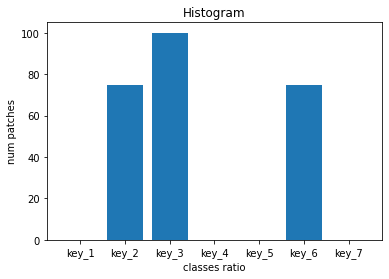

In [6]:
ska_dataset.split_train_val(random_state=42, val_portion=0.2)

## datagen + calc_rpn -> rpn_net -> rpn_to_roi -> calc_iou -> cls_net

# Training

### Get FRCNN model

In [20]:
# Choose the feature extraction model
backbone='baseline_8'

if (backbone=='baseline_8' or backbone=='baseline_16'):
    config.resizePatch = False
else:
    config.resizePatch = True

print(config.resizePatch)

checkpoint = get_model_last_checkpoint(backbone)
print(f'Model last checkpoint: {checkpoint}')

False
Checking model checkpoints in directory /Users/lorenzocellini/AI - Universit…/Deep Learning - Andre Asperti/SKA_project/SKADC1/model/baseline_8
Model last checkpoint: None


In [21]:
# input_shape_1=(config.resizeFinalDim, config.resizeFinalDim,1)
input_shape_1=100
input_shape_2=(None, 4)
backbone='baseline_8'
rpn_model, detector_model, total_model = models.get_train_model(input_shape_1=input_shape_1, input_shape_2=input_shape_2, anchor_num=config.anchor_num, pooling_regions=config.pooling_regions, num_rois=config.num_rois, num_classes=len(ska_dataset.class_list)+1, backbone=backbone, use_expander=False)

rpn_model.summary()
detector_model.summary()
total_model.summary()

Model: "RegionProposal"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_conv3 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
rpn (RpnNet)                 [(None, 50, 50, 12), (Non 326204    
Total params: 401,852
Trainable params: 363,132
Non-trainable params: 38,720
_________________________________________

### Load weights

In [22]:
models.load_weigths(rpn_model, detector_model, backbone, resume_train=False, checkpoint=checkpoint)
models.compile_models(rpn_model, detector_model, total_model, rpn_losses=[loss.rpn_loss_cls, loss.rpn_loss_regr], detector_losses=[loss.detector_loss_cls, loss.detector_loss_regr], class_list=ska_dataset.class_list)

In [15]:
# Specifically checking backbone weights

# total_model.weights[24:25][0][0][0][0]

In [23]:
# Check that all of the pretrained weights have been loaded.
import numpy as np
for i, j in zip(total_model.weights, rpn_model.weights): 
    # print(i,j)
    assert np.allclose(i,j), 'Weights don\'t match!'

### Train

In [24]:
from src.train import *
val_patch_list = None
train_frcnn(rpn_model, detector_model, total_model, ska_dataset.train_patch_list, ska_dataset.val_patch_list, ska_dataset.class_list, num_epochs=10, patches_folder_path=config.TRAIN_PATCHES_FOLDER, backbone=backbone, resume_train=False)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10
(100, 100)


100%|██████████| 14/14 [00:00<00:00, 25126.34it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 52636.58it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 26546.23it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 1:26 - rpn_cls: 5.1964 - rpn_regr: 30.5845 - detector_cls: 1.3863 - detector_regr: 0.0000e+00 - average number of objects: 2.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 36578.23it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.17391303591682453
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 21s - rpn_cls: 6.0098 - rpn_regr: 28.6226 - detector_cls: 2.2562 - detector_regr: 0.0000e+00 - average number of objects: 1.0000 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 14870.78it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 58640.01it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.24999993750001562
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 31s - rpn_cls: 6.2204 - rpn_regr: 27.3951 - detector_cls: 2.1988 - detector_regr: 0.0000e+00 - average number of objects: 0.6667

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 9003.41it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 66134.25it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 26255.42it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 34s - rpn_cls: 6.0597 - rpn_regr: 25.5661 - detector_cls: 2.2917 - detector_regr: 0.0000e+00 - average number of objects: 0.7500(100, 100)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 11592.88it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.19999998000000202
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 25s - rpn_cls: 5.9497 - rpn_regr: 23.7781 - detector_cls: 2.2700 - detector_regr: 0.0000e+00 - average number of objects: 0.6000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 37820.60it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 26068.62it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 21s - rpn_cls: 5.9178 - rpn_regr: 22.1572 - detector_cls: 2.2178 - detector_regr: 0.0000e+00 - average number of objects: 0.6667

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 22645.68it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 1.6 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 49344.75it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 24684.48it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 17s - rpn_cls: 5.9155 - rpn_regr: 20.7380 - detector_cls: 2.1792 - detector_regr: 0.0000e+00 - average number of objects: 0.8571

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 21041.66it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 10s - rpn_cls: 5.9272 - rpn_regr: 19.5027 - detector_cls: 2.1357 - detector_regr: 0.0000e+00 - average number of objects: 0.8750

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 18327.74it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 62065.25it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 5s - rpn_cls: 5.9192 - rpn_regr: 18.4424 - detector_cls: 2.0996 - detector_regr: 0.0000e+00 - average number of objects: 1.0000 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 25008.63it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 53664.50it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 22221.48it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 61s 6s/step - rpn_cls: 5.9192 - rpn_regr: 17.5066 - detector_cls: 2.0669 - detector_regr: 0.0000e+00 - average number of objects: 1.1000
Mean number of bounding boxes from RPN overlapping ground truth boxes: 1.8823529411764706
Classifier accuracy for bounding boxes from RPN: 0.625
Loss RPN classifier: 5.918699336051941
Loss RPN regression: 9.084068870544433
Loss Detector classifier: 1.7730260372161866
Loss Detector regression: 0.0
Total loss: 16.775794243812562
Elapsed time: 60.70442485809326
Total loss decreased from inf to 16.775794243812562, saving weights


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2/10
(100, 100)


100%|██████████| 15/15 [00:00<00:00, 38740.49it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 22s - rpn_cls: 6.5256 - rpn_regr: 1.2345 - detector_cls: 0.7104 - detector_regr: 0.0000e+00 - average number of objects: 1.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 28445.60it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 60326.86it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 45s - rpn_cls: 6.4246 - rpn_regr: 1.2203 - detector_cls: 0.7115 - detector_regr: 0.0000e+00 - average number of objects: 1.0000

  0%|          | 0/4 [00:00<?, ?it/s]

Average number of overlapping bounding boxes from RPN = 2.0 for 10 previous iterations
(100, 100)


100%|██████████| 14/14 [00:00<00:00, 30393.51it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 25781.88it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 40688.48it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 46s - rpn_cls: 6.2974 - rpn_regr: 1.2038 - detector_cls: 0.7069 - detector_regr: 0.0000e+00 - average number of objects: 1.3333

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 12448.47it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 32s - rpn_cls: 6.1792 - rpn_regr: 1.2430 - detector_cls: 0.6964 - detector_regr: 0.0000e+00 - average number of objects: 1.2500

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 19590.40it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 57580.76it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 27s - rpn_cls: 6.0788 - rpn_regr: 1.2528 - detector_cls: 0.6872 - detector_regr: 0.0000e+00 - average number of objects: 1.2000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 61166.93it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 62700.06it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 68571.73it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 23s - rpn_cls: 5.9976 - rpn_regr: 1.2524 - detector_cls: 0.6866 - detector_regr: 0.0000e+00 - average number of objects: 1.3333

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 18702.31it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 15s - rpn_cls: 5.9385 - rpn_regr: 1.2426 - detector_cls: 0.6934 - detector_regr: 0.0000e+00 - average number of objects: 1.4286

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 31691.00it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 57705.85it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 10s - rpn_cls: 5.8652 - rpn_regr: 1.2294 - detector_cls: 0.7024 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 17074.81it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 32540.54it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.1 for 10 previous iterations
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 63872.65it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 5s - rpn_cls: 5.7926 - rpn_regr: 1.2139 - detector_cls: 0.7063 - detector_regr: 0.0000e+00 - average number of objects: 1.5556 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 25135.66it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 49s 5s/step - rpn_cls: 5.7207 - rpn_regr: 1.1960 - detector_cls: 0.7125 - detector_regr: 0.0000e+00 - average number of objects: 1.5000
Mean number of bounding boxes from RPN overlapping ground truth boxes: 1.9333333333333333
Classifier accuracy for bounding boxes from RPN: 0.575
Loss RPN classifier: 5.073439002037048
Loss RPN regression: 1.0348124086856842
Loss Detector classifier: 0.768004035949707
Loss Detector regression: 0.0
Total loss: 6.876255446672439
Elapsed time: 49.31268882751465
Total loss decreased from 16.775794243812562 to 6.876255446672439, saving weights


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3/10
(100, 100)


100%|██████████| 20/20 [00:00<00:00, 51025.60it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 30650.68it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 14/14 [00:00<00:00, 26214.40it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 43381.48it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 38450.46it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 1:52 - rpn_cls: 4.0140 - rpn_regr: 0.5816 - detector_cls: 0.8549 - detector_regr: 0.0000e+00 - average number of objects: 2.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 43210.55it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 19s - rpn_cls: 4.3530 - rpn_regr: 0.6111 - detector_cls: 0.8743 - detector_regr: 0.0000e+00 - average number of objects: 1.5000 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 40466.03it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 36979.94it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 28s - rpn_cls: 4.3312 - rpn_regr: 12.3907 - detector_cls: 1.6912 - detector_regr: 0.0000e+00 - average number of objects: 1.3333

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 10385.61it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.3 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 43571.23it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 51675.20it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 31s - rpn_cls: 4.2188 - rpn_regr: 16.0765 - detector_cls: 1.9392 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 21161.98it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 22s - rpn_cls: 4.0713 - rpn_regr: 17.6142 - detector_cls: 2.1526 - detector_regr: 0.0000e+00 - average number of objects: 1.6000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 36361.54it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 28779.98it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 19s - rpn_cls: 3.9475 - rpn_regr: 17.9953 - detector_cls: 2.2312 - detector_regr: 0.0000e+00 - average number of objects: 1.6667

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 38990.87it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 57414.82it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 20798.20it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 15s - rpn_cls: 3.8761 - rpn_regr: 17.8770 - detector_cls: 2.2512 - detector_regr: 0.0000e+00 - average number of objects: 1.7143

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 13611.98it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 9s - rpn_cls: 3.8285 - rpn_regr: 17.5313 - detector_cls: 2.2397 - detector_regr: 0.0000e+00 - average number of objects: 1.7500 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 54935.22it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 34739.22it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 4s - rpn_cls: 3.7780 - rpn_regr: 17.0828 - detector_cls: 2.2136 - detector_regr: 0.0000e+00 - average number of objects: 1.7778

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 17174.69it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.5 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 52810.98it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 26324.08it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 59s 5s/step - rpn_cls: 3.7438 - rpn_regr: 16.5932 - detector_cls: 2.1812 - detector_regr: 0.0000e+00 - average number of objects: 1.8000


  0%|          | 0/4 [00:00<?, ?it/s]

Mean number of bounding boxes from RPN overlapping ground truth boxes: 2.5
Classifier accuracy for bounding boxes from RPN: 0.475
Loss RPN classifier: 3.4352326512336733
Loss RPN regression: 12.187141591310501
Loss Detector classifier: 1.88974649310112
Loss Detector regression: 0.0
Total loss: 17.512120735645297
Elapsed time: 58.91301918029785
Epoch 4/10
(100, 100)


100%|██████████| 15/15 [00:00<00:00, 13981.01it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 22s - rpn_cls: 2.8335 - rpn_regr: 0.6886 - detector_cls: 1.2725 - detector_regr: 0.0000e+00 - average number of objects: 2.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 13046.05it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 65054.51it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 42s - rpn_cls: 2.9226 - rpn_regr: 0.6502 - detector_cls: 1.1660 - detector_regr: 0.0000e+00 - average number of objects: 2.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 44417.74it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 38647.81it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 35074.32it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 45s - rpn_cls: 2.8993 - rpn_regr: 0.6285 - detector_cls: 1.1234 - detector_regr: 0.0000e+00 - average number of objects: 2.0000(100, 100)


100%|██████████| 15/15 [00:00<00:00, 26602.35it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 31s - rpn_cls: 2.9277 - rpn_regr: 0.6227 - detector_cls: 1.0980 - detector_regr: 0.0000e+00 - average number of objects: 1.7500

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 13123.60it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 44896.78it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 26s - rpn_cls: 2.9670 - rpn_regr: 0.6210 - detector_cls: 1.0550 - detector_regr: 0.0000e+00 - average number of objects: 1.6000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 12701.76it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 56559.10it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 25053.09it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 22s - rpn_cls: 2.9753 - rpn_regr: 0.6198 - detector_cls: 1.0345 - detector_regr: 0.0000e+00 - average number of objects: 1.6667

  0%|          | 0/4 [00:00<?, ?it/s]

Average number of overlapping bounding boxes from RPN = 2.4 for 10 previous iterations
(100, 100)


100%|██████████| 15/15 [00:00<00:00, 10752.79it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 15s - rpn_cls: 2.9958 - rpn_regr: 0.6200 - detector_cls: 1.0321 - detector_regr: 0.0000e+00 - average number of objects: 1.7143

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 9004.52it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 50247.02it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 10s - rpn_cls: 3.0300 - rpn_regr: 0.6207 - detector_cls: 1.0244 - detector_regr: 0.0000e+00 - average number of objects: 1.6250

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 8967.66it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 25815.28it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 23130.35it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 5s - rpn_cls: 3.0317 - rpn_regr: 0.6204 - detector_cls: 1.0186 - detector_regr: 0.0000e+00 - average number of objects: 1.6667 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 74987.56it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 50s 5s/step - rpn_cls: 3.0343 - rpn_regr: 0.6184 - detector_cls: 1.0143 - detector_regr: 0.0000e+00 - average number of objects: 1.7000
Mean number of bounding boxes from RPN overlapping ground truth boxes: 2.2857142857142856
Classifier accuracy for bounding boxes from RPN: 0.45
Loss RPN classifier: 3.058420789241791
Loss RPN regression: 0.6009146362543106
Loss Detector classifier: 0.9754280000925064
Loss Detector regression: 0.0
Total loss: 4.634763425588607
Elapsed time: 50.06923174858093
Total loss decreased from 6.876255446672439 to 4.634763425588607, saving weights


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5/10
(100, 100)


100%|██████████| 20/20 [00:00<00:00, 32729.64it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 31800.39it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 52s - rpn_cls: 3.5503 - rpn_regr: 0.5271 - detector_cls: 0.3852 - detector_regr: 0.0000e+00 - average number of objects: 2.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 18017.88it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 51215.79it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.1 for 10 previous iterations
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 54827.50it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 54s - rpn_cls: 3.1258 - rpn_regr: 0.5250 - detector_cls: 0.4687 - detector_regr: 0.0000e+00 - average number of objects: 2.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 27974.46it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 32s - rpn_cls: 3.1254 - rpn_regr: 0.5120 - detector_cls: 0.5102 - detector_regr: 0.0000e+00 - average number of objects: 1.6667

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 55260.92it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 56922.70it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 28s - rpn_cls: 3.1761 - rpn_regr: 0.5112 - detector_cls: 0.6027 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 27672.13it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 33568.57it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 29143.98it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 27s - rpn_cls: 3.2098 - rpn_regr: 0.5222 - detector_cls: 0.6676 - detector_regr: 0.0000e+00 - average number of objects: 1.6000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 25858.84it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 19s - rpn_cls: 3.2771 - rpn_regr: 0.5321 - detector_cls: 0.7069 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 13976.35it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 46932.73it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 14s - rpn_cls: 3.3240 - rpn_regr: 0.5376 - detector_cls: 0.7354 - detector_regr: 0.0000e+00 - average number of objects: 1.5714

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 26214.40it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.4 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 39102.93it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 57919.04it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 10s - rpn_cls: 3.3414 - rpn_regr: 0.5422 - detector_cls: 0.7517 - detector_regr: 0.0000e+00 - average number of objects: 1.6250

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 9421.17it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 4s - rpn_cls: 3.3489 - rpn_regr: 0.5455 - detector_cls: 0.7676 - detector_regr: 0.0000e+00 - average number of objects: 1.5556 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 52626.15it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 54546.05it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 52s 5s/step - rpn_cls: 3.3563 - rpn_regr: 0.5499 - detector_cls: 0.7788 - detector_regr: 0.0000e+00 - average number of objects: 1.5000
Mean number of bounding boxes from RPN overlapping ground truth boxes: 2.1578947368421053
Classifier accuracy for bounding boxes from RPN: 0.525
Loss RPN classifier: 3.4226186156272886
Loss RPN regression: 0.5886640936136246
Loss Detector classifier: 0.8799301236867905
Loss Detector regression: 0.0
Total loss: 4.891212832927704
Elapsed time: 51.80808091163635
Epoch 6/10


  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 16611.10it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 35576.69it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 11472.91it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 1:09 - rpn_cls: 2.2720 - rpn_regr: 0.5102 - detector_cls: 1.2463 - detector_regr: 0.0000e+00 - average number of objects: 2.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 29537.35it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 19s - rpn_cls: 2.4472 - rpn_regr: 0.4740 - detector_cls: 1.1129 - detector_regr: 0.0000e+00 - average number of objects: 1.5000 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 16194.22it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 57414.82it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 28s - rpn_cls: 2.4451 - rpn_regr: 0.4781 - detector_cls: 1.0645 - detector_regr: 0.0000e+00 - average number of objects: 1.6667

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 28574.33it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.1 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 43883.14it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 30708.75it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 31s - rpn_cls: 2.4455 - rpn_regr: 0.4843 - detector_cls: 1.0303 - detector_regr: 0.0000e+00 - average number of objects: 1.7500

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 6538.62it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 22s - rpn_cls: 2.4750 - rpn_regr: 0.4929 - detector_cls: 1.0033 - detector_regr: 0.0000e+00 - average number of objects: 1.8000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 7277.99it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 10467.85it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 19s - rpn_cls: 2.5210 - rpn_regr: 0.5001 - detector_cls: 0.9832 - detector_regr: 0.0000e+00 - average number of objects: 1.6667

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 16806.03it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 43980.01it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 22104.37it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 15s - rpn_cls: 2.5557 - rpn_regr: 0.5072 - detector_cls: 0.9705 - detector_regr: 0.0000e+00 - average number of objects: 1.7143

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 13295.55it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 9s - rpn_cls: 2.5965 - rpn_regr: 0.5131 - detector_cls: 0.9578 - detector_regr: 0.0000e+00 - average number of objects: 1.7500 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 15057.63it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 41658.01it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 4s - rpn_cls: 2.6389 - rpn_regr: 0.5175 - detector_cls: 0.9478 - detector_regr: 0.0000e+00 - average number of objects: 1.7778

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 8505.25it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.7 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 46332.43it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 38956.38it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 54s 5s/step - rpn_cls: 2.6828 - rpn_regr: 0.5233 - detector_cls: 0.9408 - detector_regr: 0.0000e+00 - average number of objects: 1.8000
Mean number of bounding boxes from RPN overlapping ground truth boxes: 2.588235294117647
Classifier accuracy for bounding boxes from RPN: 0.5
Loss RPN classifier: 3.0778380393981934
Loss RPN regression: 0.5760801881551743
Loss Detector classifier: 0.8780768871307373
Loss Detector regression: 0.0
Total loss: 4.531995114684105
Elapsed time: 54.05436420440674
Total loss decreased from 4.634763425588607 to 4.531995114684105, saving weights


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 7/10
(100, 100)


100%|██████████| 15/15 [00:00<00:00, 33843.23it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 22s - rpn_cls: 2.4779 - rpn_regr: 0.5313 - detector_cls: 0.3869 - detector_regr: 0.0000e+00 - average number of objects: 1.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 41160.98it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 44695.33it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 42s - rpn_cls: 2.5859 - rpn_regr: 0.5271 - detector_cls: 0.5507 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 11335.96it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 71729.77it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 25216.26it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 41s - rpn_cls: 2.7013 - rpn_regr: 0.5522 - detector_cls: 0.6337 - detector_regr: 0.0000e+00 - average number of objects: 1.6667

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 17461.72it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 28s - rpn_cls: 2.7928 - rpn_regr: 0.5691 - detector_cls: 0.7074 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 13317.36it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 54884.14it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 24s - rpn_cls: 2.8825 - rpn_regr: 0.5833 - detector_cls: 0.7467 - detector_regr: 0.0000e+00 - average number of objects: 1.4000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 23563.51it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.1 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 38075.38it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 56616.03it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 20s - rpn_cls: 2.9377 - rpn_regr: 0.5925 - detector_cls: 0.7745 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 21305.30it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 14s - rpn_cls: 2.9825 - rpn_regr: 0.5953 - detector_cls: 0.7945 - detector_regr: 0.0000e+00 - average number of objects: 1.4286

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 12893.65it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 57497.67it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 9s - rpn_cls: 3.0083 - rpn_regr: 0.5963 - detector_cls: 0.8091 - detector_regr: 0.0000e+00 - average number of objects: 1.5000 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 8153.33it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 36256.49it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 13497.36it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 5s - rpn_cls: 3.0311 - rpn_regr: 0.5982 - detector_cls: 0.8156 - detector_regr: 0.0000e+00 - average number of objects: 1.5556

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 37968.96it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 46s 5s/step - rpn_cls: 3.0570 - rpn_regr: 0.5995 - detector_cls: 0.8166 - detector_regr: 0.0000e+00 - average number of objects: 1.5000


  0%|          | 0/4 [00:00<?, ?it/s]

Mean number of bounding boxes from RPN overlapping ground truth boxes: 2.0588235294117645
Classifier accuracy for bounding boxes from RPN: 0.525
Loss RPN classifier: 3.2892939329147337
Loss RPN regression: 0.6116275608539581
Loss Detector classifier: 0.8247880190610886
Loss Detector regression: 0.0
Total loss: 4.725709512829781
Elapsed time: 45.693538188934326
Epoch 8/10
(100, 100)


100%|██████████| 20/20 [00:00<00:00, 33434.07it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.2 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 54921.97it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 49s - rpn_cls: 4.7276 - rpn_regr: 0.6256 - detector_cls: 0.5687 - detector_regr: 0.0000e+00 - average number of objects: 1.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 11843.54it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 34724.09it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 50231.19it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 53s - rpn_cls: 4.2123 - rpn_regr: 0.5950 - detector_cls: 0.5528 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 15047.73it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 31s - rpn_cls: 3.9602 - rpn_regr: 0.5707 - detector_cls: 0.5827 - detector_regr: 0.0000e+00 - average number of objects: 1.3333

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 22900.92it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 35450.08it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 28s - rpn_cls: 3.8258 - rpn_regr: 1.7643 - detector_cls: 0.6069 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 36654.34it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 44821.02it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 26973.02it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 26s - rpn_cls: 3.7218 - rpn_regr: 2.2965 - detector_cls: 0.6276 - detector_regr: 0.0000e+00 - average number of objects: 1.6000

  0%|          | 0/4 [00:00<?, ?it/s]

Average number of overlapping bounding boxes from RPN = 1.7 for 10 previous iterations
(100, 100)


100%|██████████| 15/15 [00:00<00:00, 14675.66it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 18s - rpn_cls: 3.6571 - rpn_regr: 2.5433 - detector_cls: 0.6315 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 35696.20it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 62700.06it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 14s - rpn_cls: 3.6022 - rpn_regr: 2.6540 - detector_cls: 0.6383 - detector_regr: 0.0000e+00 - average number of objects: 1.5714

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 48449.06it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 43858.99it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 38836.15it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 9s - rpn_cls: 3.5484 - rpn_regr: 2.6956 - detector_cls: 0.6384 - detector_regr: 0.0000e+00 - average number of objects: 1.6250 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 7580.07it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 4s - rpn_cls: 3.4918 - rpn_regr: 2.6999 - detector_cls: 0.6483 - detector_regr: 0.0000e+00 - average number of objects: 1.5556

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 26886.56it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 27651.55it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 48s 5s/step - rpn_cls: 3.4369 - rpn_regr: 2.6812 - detector_cls: 0.6593 - detector_regr: 0.0000e+00 - average number of objects: 1.6000


  0%|          | 0/4 [00:00<?, ?it/s]

Mean number of bounding boxes from RPN overlapping ground truth boxes: 1.95
Classifier accuracy for bounding boxes from RPN: 0.55
Loss RPN classifier: 2.9429466128349304
Loss RPN regression: 2.5127266108989716
Loss Detector classifier: 0.758382362127304
Loss Detector regression: 0.0
Total loss: 6.214055585861206
Elapsed time: 48.401129961013794
Epoch 9/10
(100, 100)


100%|██████████| 14/14 [00:00<00:00, 12821.02it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.4 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 42707.28it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 43652.77it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 59s - rpn_cls: 5.1226 - rpn_regr: 0.7543 - detector_cls: 0.7324 - detector_regr: 0.0000e+00 - average number of objects: 2.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 9500.84it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 18s - rpn_cls: 4.5854 - rpn_regr: 0.6881 - detector_cls: 0.8815 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 14155.60it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 39026.33it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 25s - rpn_cls: 4.3062 - rpn_regr: 0.6723 - detector_cls: 0.8831 - detector_regr: 0.0000e+00 - average number of objects: 1.3333

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 15575.66it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 42209.63it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 38362.54it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 27s - rpn_cls: 4.2247 - rpn_regr: 0.6557 - detector_cls: 0.8580 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 26456.92it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 20s - rpn_cls: 4.1555 - rpn_regr: 0.6379 - detector_cls: 0.8294 - detector_regr: 0.0000e+00 - average number of objects: 1.4000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 31115.01it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 43786.69it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 17s - rpn_cls: 4.1283 - rpn_regr: 0.6279 - detector_cls: 0.8443 - detector_regr: 0.0000e+00 - average number of objects: 1.5000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 22301.65it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 2.1 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 32211.71it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 27578.99it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 14s - rpn_cls: 4.0853 - rpn_regr: 0.6239 - detector_cls: 0.8634 - detector_regr: 0.0000e+00 - average number of objects: 1.5714

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 15405.13it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 8s - rpn_cls: 4.0347 - rpn_regr: 0.6190 - detector_cls: 0.8737 - detector_regr: 0.0000e+00 - average number of objects: 1.6250 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 42733.61it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 31991.88it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 4s - rpn_cls: 3.9839 - rpn_regr: 0.6144 - detector_cls: 0.8789 - detector_regr: 0.0000e+00 - average number of objects: 1.6667

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 52056.96it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 44495.69it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 22682.13it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 49s 5s/step - rpn_cls: 3.9417 - rpn_regr: 0.6105 - detector_cls: 0.8807 - detector_regr: 0.0000e+00 - average number of objects: 1.7000


  0%|          | 0/4 [00:00<?, ?it/s]

Mean number of bounding boxes from RPN overlapping ground truth boxes: 2.25
Classifier accuracy for bounding boxes from RPN: 0.525
Loss RPN classifier: 3.5613637924194337
Loss RPN regression: 0.575358834862709
Loss Detector classifier: 0.896713936328888
Loss Detector regression: 0.0
Total loss: 5.033436563611031
Elapsed time: 48.99970102310181
Epoch 10/10
(100, 100)


100%|██████████| 15/15 [00:00<00:00, 18471.69it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 1/10 [==>...........................] - ETA: 22s - rpn_cls: 0.9843 - rpn_regr: 0.3925 - detector_cls: 0.9602 - detector_regr: 0.0000e+00 - average number of objects: 1.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 19798.46it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 60648.23it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 2/10 [=====>........................] - ETA: 41s - rpn_cls: 1.6237 - rpn_regr: 0.4522 - detector_cls: 0.9464 - detector_regr: 0.0000e+00 - average number of objects: 1.0000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 54674.35it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 52636.58it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Exception: 'NoneType' object is not iterable
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 37393.50it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 3/10 [========>.....................] - ETA: 41s - rpn_cls: 2.0917 - rpn_regr: 0.4751 - detector_cls: 0.9473 - detector_regr: 0.0000e+00 - average number of objects: 1.3333

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 16144.36it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 4/10 [===========>..................] - ETA: 28s - rpn_cls: 2.3224 - rpn_regr: 0.4938 - detector_cls: 0.9428 - detector_regr: 0.0000e+00 - average number of objects: 1.2500

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 22471.49it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
Average number of overlapping bounding boxes from RPN = 1.9 for 10 previous iterations
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 62947.69it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 5/10 [==============>...............] - ETA: 24s - rpn_cls: 2.4344 - rpn_regr: 0.5083 - detector_cls: 0.9224 - detector_regr: 0.0000e+00 - average number of objects: 1.2000

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 28055.55it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 52052.11it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 44739.24it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 6/10 [=================>............] - ETA: 21s - rpn_cls: 2.5237 - rpn_regr: 0.5217 - detector_cls: 0.9045 - detector_regr: 0.0000e+00 - average number of objects: 1.3333

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 15/15 [00:00<00:00, 61022.85it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 7/10 [====================>.........] - ETA: 14s - rpn_cls: 2.5978 - rpn_regr: 0.5317 - detector_cls: 0.8862 - detector_regr: 0.0000e+00 - average number of objects: 1.2857

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 20/20 [00:00<00:00, 13879.23it/s]


Starting rpn model training on patch 3100_16376_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 40411.65it/s]


Starting rpn model training on patch 1600_16426_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 8/10 [=======================>......] - ETA: 9s - rpn_cls: 2.6673 - rpn_regr: 0.5397 - detector_cls: 0.8718 - detector_regr: 0.0000e+00 - average number of objects: 1.2500 

  0%|          | 0/4 [00:00<?, ?it/s]

(100, 100)


100%|██████████| 14/14 [00:00<00:00, 12506.98it/s]


Starting rpn model training on patch 100_16476_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 19/19 [00:00<00:00, 51815.20it/s]


Starting rpn model training on patch 3150_16426_16829_100
(1, 100, 100, 3)
(1, 50, 50, 12)


  0%|          | 0/4 [00:00<?, ?it/s]

Best IoU found in this run: 0.9999990000010001
Exception: 'a' cannot be empty unless no samples are taken
(100, 100)


100%|██████████| 12/12 [00:00<00:00, 63072.24it/s]


Starting rpn model training on patch 0_16376_16729_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
 9/10 [==========================>...] - ETA: 5s - rpn_cls: 2.7236 - rpn_regr: 0.5461 - detector_cls: 0.8668 - detector_regr: 0.0000e+00 - average number of objects: 1.3333

  0%|          | 0/4 [00:00<?, ?it/s]

Average number of overlapping bounding boxes from RPN = 1.9 for 10 previous iterations
(100, 100)


100%|██████████| 15/15 [00:00<00:00, 19181.27it/s]


Starting rpn model training on patch 1550_16376_16779_100
(1, 100, 100, 3)
(1, 50, 50, 12)
Best IoU found in this run: 0.9999990000010001
Starting detector model training on batch
10/10 [==============================] - 45s 5s/step - rpn_cls: 2.7740 - rpn_regr: 0.5518 - detector_cls: 0.8657 - detector_regr: 0.0000e+00 - average number of objects: 1.4000
Mean number of bounding boxes from RPN overlapping ground truth boxes: 1.8125
Classifier accuracy for bounding boxes from RPN: 0.525
Loss RPN classifier: 3.2275130808353425
Loss RPN regression: 0.6032532215118408
Loss Detector classifier: 0.8555653363466262
Loss Detector regression: 0.0
Total loss: 4.68633163869381
Elapsed time: 45.29288411140442
Training complete.


# Validation

In [20]:
input_shape_1=(config.resizeFinalDim, config.resizeFinalDim,1)
input_shape_2=(None, 4)

rpn_model_eval, detector_model_eval, total_model_eval = models.get_eval_model(input_shape_1=input_shape_1, input_shape_2=input_shape_2, input_shape_fmap=None, anchor_num=config.anchor_num, pooling_regions=config.pooling_regions, num_rois=config.num_rois, num_classes=len(ska_dataset.class_list)+1, backbone=backbone, use_expander=False)

rpn_model_eval.summary()
detector_model_eval.summary()
total_model_eval.summary()

____________
activation_13 (Activation)      (None, 75, 75, 128)  0           bn3b_branch2a[0][0]              
__________________________________________________________________________________________________
res3b_branch2b (Conv2D)         (None, 75, 75, 128)  147584      activation_13[0][0]              
__________________________________________________________________________________________________
bn3b_branch2b (BatchNormalizati (None, 75, 75, 128)  512         res3b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_14 (Activation)      (None, 75, 75, 128)  0           bn3b_branch2b[0][0]              
__________________________________________________________________________________________________
res3b_branch2c (Conv2D)         (None, 75, 75, 512)  66048       activation_14[0][0]              
________________________________________________________________________________________________

In [21]:
# Models used for mAP eval
models.load_weigths(rpn_model_eval, detector_model_eval, backbone, checkpoint=0)
models.compile_models(rpn_model_eval, detector_model_eval, total_model_eval, rpn_losses=[loss.rpn_loss_cls, loss.rpn_loss_regr], detector_losses=[loss.detector_loss_cls, loss.detector_loss_regr], class_list=ska_dataset.class_list)

In [42]:
# Spostare in una funzione "evaluate model" che fa la predict su tutte le img di validation e calcola il map
patch_id = ska_dataset.train_patch_list[48:50]
print(patch_id)
gt = pd.read_pickle(f'{config.TRAIN_PATCHES_FOLDER}/{patch_id[0]}/{patch_id[0]}.pkl')
display(gt['class_label'])

preds, mAP, prec, recall = evaluate_model(rpn_model_eval, detector_model_eval, backbone, patch_id, ska_dataset.class_list)

print(preds)

['26350_16376_17579_100', '26400_16426_17579_100']


0     2_1
1     2_1
2     2_1
3     2_1
4     3_1
5     2_1
6     2_1
7     2_1
8     2_1
9     2_1
10    2_1
11    2_1
12    2_1
13    2_1
14    2_1
15    2_1
16    2_1
Name: class_label, dtype: object

Predict
rpn_to_roi
(1, 38, 38, 15)
/Users/lorenzocellini/AI - Universit…/Deep Learning - Andre Asperti/SKA_project/SKADC1/src/utils.py:326: RuntimeWarning: overflow encountered in exp
  y1 = cy1 - h1/2.
/Users/lorenzocellini/AI - Universit…/Deep Learning - Andre Asperti/SKA_project/SKADC1/src/utils.py:155: RuntimeWarning: invalid value encountered in add
  # with warnings.catch_warnings():
/Users/lorenzocellini/AI - Universit…/Deep Learning - Andre Asperti/SKA_project/SKADC1/src/utils.py:325: RuntimeWarning: overflow encountered in exp
  x1 = cx1 - w1/2.
/Users/lorenzocellini/AI - Universit…/Deep Learning - Andre Asperti/SKA_project/SKADC1/src/utils.py:154: RuntimeWarning: invalid value encountered in add
  
Elapsed:14.6375572681427
Predict
rpn_to_roi
(1, 38, 38, 15)
/Users/lorenzocellini/AI - Universit…/Deep Learning - Andre Asperti/SKA_project/SKADC1/src/utils.py:326: RuntimeWarning: overflow encountered in exp
  y1 = cy1 - h1/2.
/Users/lorenzocellini/AI - Universit…/Deep Learning - 

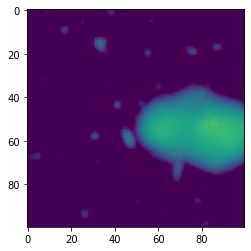

In [52]:
print_img(config.TRAIN_PATCHES_FOLDER, '0_16376_16729_100')

In [266]:
anch = pd.read_pickle(f'{config.EVAL_RESULTS}/{patch_id[0]}/{patch_id[0]}.pkl')

In [267]:
anch['width'] = anch['x2s'] - anch['x1s']
anch['heght'] = anch['y2s'] - anch['y1s']

In [268]:
anch.describe() 

,x1s,y1s,x2s,y2s,class,prob,width,heght
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TODO - 20210508:
- [X] troncamento rumore a 1e-6 tramite half gaussian

TODO - 20210605:
- [X] modificare RPNNet in modo che dia in output anche la backbone - Lorenzo
- [X] scrivere bene training loop: salvare le loss in un df su disco + salvare pesi modello ad ogni giro (Lorenzo - finire di debuggare)

TODO - 20210620:
- [x] implementare mAP in una funzione che prende come parametro un modello o i suoi pesi
- [x] implementare resNet50
- [x] implementare predicted rois - Lorenzo
- [X] implementare plot loss training - Lorenzo
- [X] finire classe datasetv2 - Alice
- [X] check se su colab le performance sono migliori - Lorenzo

TODO - 20210627
- [X] split dataset su combinazioni classi - Alice
- [x] provare campionamento random patch ed osservare le due distribuzioni - Alice

TODO - 20210703
- [x] sistemare salvataggio loss training loop - Lorenzo
- [x] Riscalare immagini tra 0-255 - Alice
- [x] capire se passare tre immagini diverse come input
- [x] usare media vgg16 per zero-centering - Alice

TODO - 20210705
- [x] sistemare nomi funzioni dataset per trasformazione rgb

TODO - 20210711
- [x] rifattorizzare classe dataset spostando nel costruttore i metodi che calcolano i suoi attributi - Lorenzo
- [x] chek valori pixel in input per resnet
- [x] fare funzione per plottare le predictions
- [ ] trainare tutto su colab

TODO - 20210714
- [x] ragionare su come scalare le immagini fra 0 e 1, attualmente hanno tanti valori schiacciati a 0 e il massimo su tutto il train a a 0.4

TODO - 20210717
- [ ] Ablation study: provare a rimuovere stage4 nella resnet - se c'è tempo
- [x] Provare con nostra pixel_mean e con vgg16 pixel_mean -> per il momento abbiamo scartato la prima opzione
- [ ] Fare qualche analisi di distribuzione delle classi/dim box del dataset - Alice
- [x] Aggiungere normalizzazione dopo zero centering per resNet50, sulla base del range globale dell'immagine di training
- [ ] Provare pulizia dataset originale sulla base del rumore/flusso - Alice
- [ ] Cambiare nomi di tutto - alla fine
- [x] implementare zero-centering su volare medio RGB delle nostre patch
- [x] Funzione che trova l'ultimo checkpoint in colab prima del load_weights - Lorenzo

TODO - 20210801
- [ ] Debuggare training baseline 8 e 16 - L
- [ ] Finire prove pulizia dataseet noise variando k - A

1.  Summary
    - riassunto progetto
2.  Background
    - SoTA + teoria di base
3.  System Description
    - descrizione dei nostri modelli e dei loro componenti (moduli)
4.  Experimental setup and results
    - dataset pre processing
    - training environment
    - metrics
    - results
5.  Results and error analysis
6.  Discussion

# Plotting

In [21]:
loss_history = np.load(f"./model/{backbone}/loss_history.npy")
print(loss_history.shape)

(21, 5)


In [245]:
loss_history

array([[2.21167493e+00, 5.48505938e+01, 1.41033335e+01, 9.02264648e+02,
        1.25000000e-01],
       [3.47529209e+00, 6.21291500e+00, 1.20885715e+01, 2.05328012e+00,
        2.50000000e-01],
       [3.08124007e+00, 4.84355471e+00, 8.05904770e+00, 2.38956679e+01,
        5.00000000e-01],
       [2.60109515e+00, 1.80010146e+00, 6.68381833e+00, 1.44240359e+01,
        4.75000000e-01],
       [3.40300663e+00, 1.71771869e+00, 8.33843269e+00, 1.56928931e+01,
        4.50000000e-01],
       [3.16217673e+00, 5.52144847e-01, 8.05904770e+00, 3.37423466e+01,
        5.00000000e-01],
       [3.15954884e+00, 2.11416296e-01, 2.44386007e+00, 1.61016402e+00,
        5.25000000e-01],
       [4.03812165e+00, 1.64660653e-01, 7.46127805e-01, 4.78080065e-01,
        5.50000000e-01],
       [3.41979742e+00, 1.61025919e-01, 9.01550260e-01, 6.71743631e-01,
        4.50000000e-01],
       [2.56015201e+00, 1.47500894e-01, 7.04970554e-01, 4.51246776e-01,
        6.00000000e-01],
       [2.21090159e+00, 1.3848

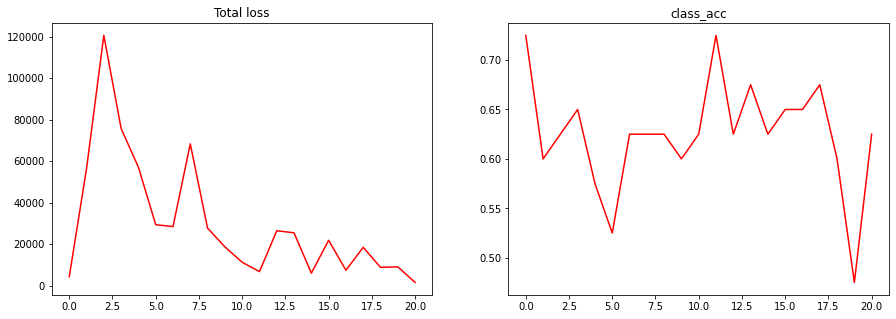

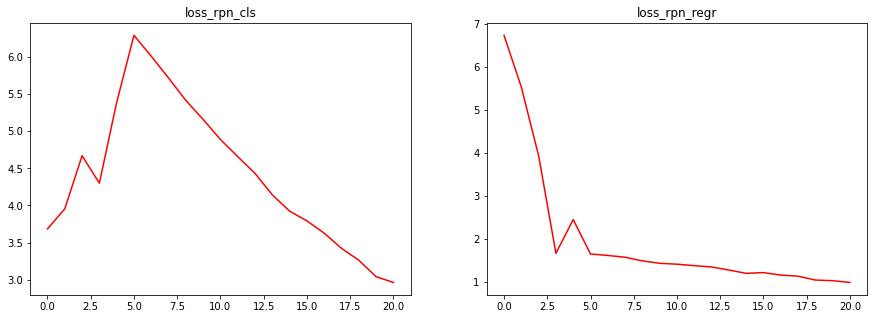

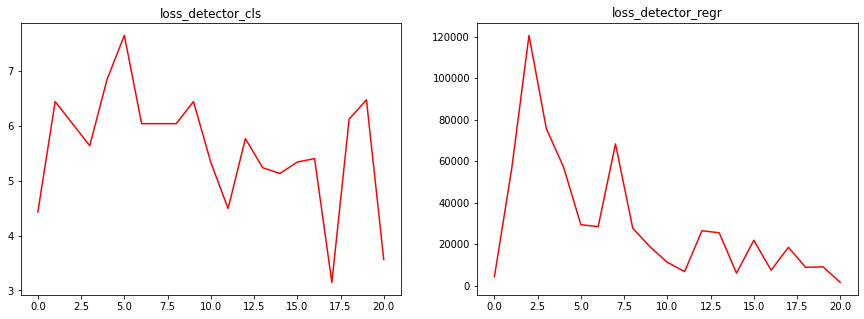

In [22]:
plot_loss(loss_history)

In [1]:
# from tensorflow.keras.applications import EfficientNetB0
# model = EfficientNetB0(weights='imagenet')